In [1]:
import os
#import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import sys; sys.path.append("/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)


Welcome to JupyROOT 6.13/02


<module 'postprocessing_utils' from '/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/python/postprocessing_utils.pyc'>

In [2]:
#ntuples = '20170526'
ntuples = '2016'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2016.root" in s]
bkgr = [s for s in files if "DoubleEG_2016.root" in s]
#signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2016_ptmjj.root" in s]
#bkgr = [s for s in files if "DoubleEG_2016_ptmjj.root" in s]
#signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2016_MXcut.root" in s]
#bkgr = [s for s in files if "DoubleEG_2016_MXcut.root" in s]

#bkgr = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root" in s]
#diphotonJets = [s for s in files if "DiPhotonJets" in s]
#gJets_lowPt = [s for s in files if "GJet_Pt-20to40" in s]
#gJets_highPt = [s for s in files if "GJet_Pt-40" in s]

utils.IO.add_signal(ntuples,signal,1)
utils.IO.add_background(ntuples,bkgr,-1)
#utils.IO.add_background(ntuples,gJets_lowPt,-2)
#utils.IO.add_background(ntuples,gJets_highPt,-2)

ntuples = '2017'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2017.root" in s]
bkgr = [s for s in files if "DoubleEG_2017.root" in s]
#signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2017_ptmjj.root" in s]
#bkgr = [s for s in files if "DoubleEG_2017_ptmjj.root" in s]
#signal = [s for s in files if "output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2017_MXcut.root" in s]
#bkgr = [s for s in files if "DoubleEG_2017_MXcut.root" in s]

utils.IO.add_signal(ntuples,signal,-1)
utils.IO.add_background(ntuples,bkgr,-1)


for i in range(len(utils.IO.backgroundName)):        
    print "using background file n."+str(i)+": "+utils.IO.backgroundName[i]
for i in range(len(utils.IO.signalName)):    
    print "using signal file n."+str(i)+": "+utils.IO.signalName[i]

env: data=/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2016
env: data=/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017
using background file n.0: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2016/DoubleEG_2016.root
using background file n.1: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017/DoubleEG_2017.root
using signal file n.0: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2016/output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2016.root
using signal file n.1: /home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2017/output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph_2017.root


In [3]:
#use noexpand for root expressions, it needs this file https://github.com/ibab/root_pandas/blob/master/root_pandas/readwrite.py
#standart of input values 
branch_names = 'absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,PhoJetMinDr,leadingJet_DeepCSV,subleadingJet_DeepCSV,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,leadingJet_bRegNNResolution,subleadingJet_bRegNNResolution,noexpand:sigmaMJets/Mjj'.split(",")
#st values with adding pt_gg/m_gg
#branch_names = 'absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,PhoJetMinDr,leadingJet_DeepCSV,subleadingJet_DeepCSV,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,leadingJet_bRegNNResolution,subleadingJet_bRegNNResolution,noexpand:sigmaMJets/Mjj,noexpand:leadingPhoton_pt/CMS_hgg_mass,noexpand:subleadingPhoton_pt/CMS_hgg_mass'.split(",")
#st values with adding pt_gg/m_gg, pt_jj/M_jj
#branch_names = 'absCosThetaStar_CS,absCosTheta_bb,absCosTheta_gg,PhoJetMinDr,leadingJet_DeepCSV,subleadingJet_DeepCSV,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverM,diphotonCandidatePtOverdiHiggsM,dijetCandidatePtOverdiHiggsM,leadingJet_bRegNNResolution,subleadingJet_bRegNNResolution,noexpand:sigmaMJets/Mjj,noexpand:leadingPhoton_pt/CMS_hgg_mass,noexpand:subleadingPhoton_pt/CMS_hgg_mass,noexpand:leadingJet_pt/Mjj,noexpand:subleadingJet_pt/Mjj,PhoJetotherDr'.split(",")

branch_names = [c.strip() for c in branch_names]
#branch_names = (b.replace(" ", "_") for b in branch_names)
#branch_names = list(b.replace("-", "_") for b in branch_names)
print branch_names
#features = 'PhoJetMinDr'.split(",")
#cuts='(Jet_mcPt > 20) & (Jet_mcFlavour==5 | Jet_mcFlavour==-5) & (Jet_pt > 15) & (Jet_eta<2.4 & Jet_eta>-2.4) & (dR < 0.4)'
#cuts='PhoJetMinDr > 2'

import pandas as pd
import root_pandas as rpd
from root_numpy import root2array, list_trees

# type pandas DataFrame
#X_features = preprocessing.set_features("tagsDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0",branch_names,features,cuts)
#X_target = preprocessing.set_target("tagsDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0",branch_names,target,cuts)
#X_features,X_target=preprocessing.randomize_ft(X_features,X_target)

#utils.IO.get_cross_sections('jsons/datasets80X_Moriond.json')
#utils.IO.w_sig.append(utils.IO.get_weight('signal','nrSM',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','DiPhoJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',1))

#print list_trees('/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/2016/output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root')
for i in range(len(utils.IO.backgroundName)):        
    print list_trees(utils.IO.backgroundName[i])
        
#preprocessing.set_signals_and_backgrounds("bbggSelectionTree",branch_names)
#preprocessing.set_signals_and_backgrounds("tagsDumper/trees/GluGluToHHTo2B2G_nodesPlusSM_13TeV_madgraph_13TeV_DoubleHTag_0",branch_names)
#preprocessing.set_signals("tagsDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0",branch_names,True)
#preprocessing.set_backgrounds("tagsDumper/trees/Data_13TeV_DoubleHTag_0",branch_names,True) 
preprocessing.set_signals("GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0",branch_names,True)
preprocessing.set_backgrounds("Data_13TeV_DoubleHTag_0",branch_names,True) 
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=preprocessing.set_variables(branch_names)

#relative weighting between components of one class is kept, all classes normalized to the same
#weights_sig=preprocessing.weight_signal_with_resolution(weights_sig,y_sig)
weights_bkg,weights_sig=preprocessing.normalize_process_weights(weights_bkg,y_bkg,weights_sig,y_sig)

X_bkg,y_bkg,weights_bkg = preprocessing.randomize(X_bkg,y_bkg,weights_bkg)
X_sig,y_sig,weights_sig = preprocessing.randomize(X_sig,y_sig,weights_sig)

print X_bkg.shape
print y_bkg.shape
#bbggTrees have by default signal and CR events, let's be sure that we clean it
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=preprocessing.clean_signal_events(X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig)
print X_bkg.shape
print y_bkg.shape

y_total_train = preprocessing.get_total_training_sample(y_sig,y_bkg).ravel()
X_total_train = preprocessing.get_total_training_sample(X_sig,X_bkg)

y_total_test = preprocessing.get_total_test_sample(y_sig,y_bkg).ravel()
X_total_test = preprocessing.get_total_test_sample(X_sig,X_bkg)

w_total_train = preprocessing.get_total_training_sample(weights_sig,weights_bkg).ravel()
w_total_test = preprocessing.get_total_test_sample(weights_sig,weights_bkg).ravel()


['absCosThetaStar_CS', 'absCosTheta_bb', 'absCosTheta_gg', 'PhoJetMinDr', 'leadingJet_DeepCSV', 'subleadingJet_DeepCSV', 'leadingPhotonSigOverE', 'subleadingPhotonSigOverE', 'sigmaMOverM', 'diphotonCandidatePtOverdiHiggsM', 'dijetCandidatePtOverdiHiggsM', 'leadingJet_bRegNNResolution', 'subleadingJet_bRegNNResolution', 'noexpand:sigmaMJets/Mjj']
['Data_13TeV_DoubleHTag_0']
['Data_13TeV_DoubleHTag_0']
using tree:GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0
(508299, 14)
(508299, 1)
(508299, 14)
(508299, 1)


In [4]:
########final optimization with all fixed#######

from sklearn.externals import joblib
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#X_all = preprocessing.cut_region(utils.IO.signalName[0],"tagsDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0",branch_names,features,cuts)

#clf = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
#       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
#       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=20,
#       objective='binary:logistic', reg_alpha=0, reg_lambda=0.1,
#       scale_pos_weight=1, seed=0, silent=True, subsample=1)
params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
       'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 10,
       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 2000, 'nthread': 20,
       'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1,
       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 10,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 500, 'nthread': 20,
#       'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#params = {'base_score': 0.5, 'booster':'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 5,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 2000, 'n_jobs':1, 'nthread': 12,
#       'objective': 'binary:logistic', 'random_state':0, 'reg_alpha': 0, 'reg_lambda': 1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 1000, 'nthread': 12,
#       'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
#params = {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1,
#       'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3,
#       'min_child_weight': 1e-05, 'missing': None, 'n_estimators': 40, 'nthread': 20,
#       'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 0.1,
#       'scale_pos_weight': 1, 'seed': 0, 'silent': True, 'subsample': 1 }
clf = xgb.XGBClassifier(**params)
eval_set = [(X_total_train, y_total_train), (X_total_test, y_total_test)]
clf.fit(X_total_train, y_total_train, sample_weight=w_total_train, eval_metric=["error", "logloss", "auc"], eval_set=eval_set, verbose=True)
#clf.fit(X_total_train,y_total_train, sample_weight=w_total_train)
mse = mean_squared_error(y_total_test, clf.predict(X_total_test))
print("MSE: %.4f" % mse)
#clf.evals_result()
print clf.score(X_total_train,y_total_train)
#print clf.best_params_
joblib.dump(clf, os.path.expanduser('/home/ovtin/cernbox/HHggbb/HHbbgg_ETH_devel/Training/output_files/simlple_Test_binary_st.pkl'), compress=9)
#joblib.dump(clf, os.path.expanduser('~/HHbbgg_ETH_devel/Training/output_files/simlple_Test_binary.pkl'), compress=9)

[0]	validation_0-error:0.067931	validation_0-logloss:0.650768	validation_0-auc:0.841031	validation_1-error:0.068576	validation_1-logloss:0.650792	validation_1-auc:0.844175
[1]	validation_0-error:0.070357	validation_0-logloss:0.613354	validation_0-auc:0.843409	validation_1-error:0.070727	validation_1-logloss:0.6134	validation_1-auc:0.846581
[2]	validation_0-error:0.070351	validation_0-logloss:0.58022	validation_0-auc:0.845525	validation_1-error:0.070619	validation_1-logloss:0.58028	validation_1-auc:0.848585
[3]	validation_0-error:0.070411	validation_0-logloss:0.550846	validation_0-auc:0.84559	validation_1-error:0.070682	validation_1-logloss:0.550923	validation_1-auc:0.848659
[4]	validation_0-error:0.069343	validation_0-logloss:0.524281	validation_0-auc:0.849145	validation_1-error:0.069605	validation_1-logloss:0.524366	validation_1-auc:0.852236
[5]	validation_0-error:0.068064	validation_0-logloss:0.500851	validation_0-auc:0.84924	validation_1-error:0.068471	validation_1-logloss:0.500941	

KeyboardInterrupt: 

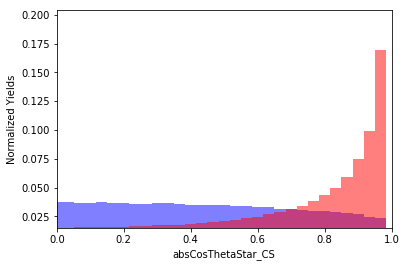

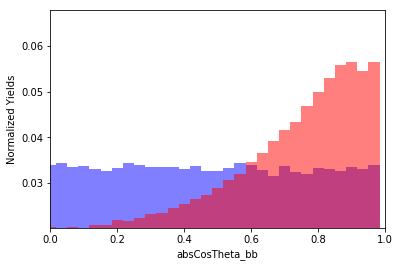

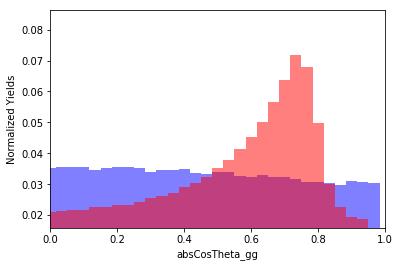

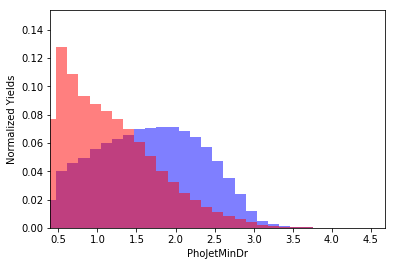

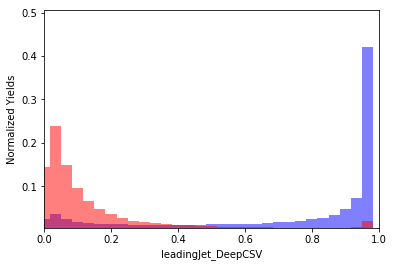

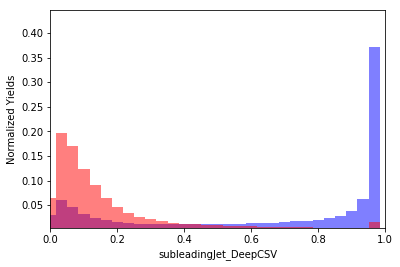

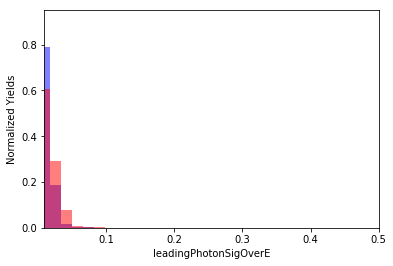

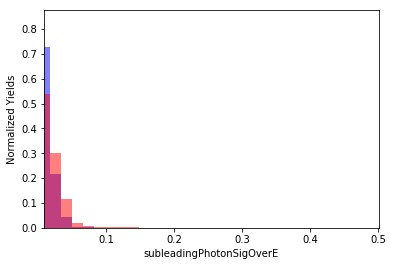

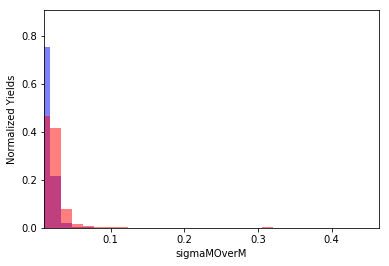

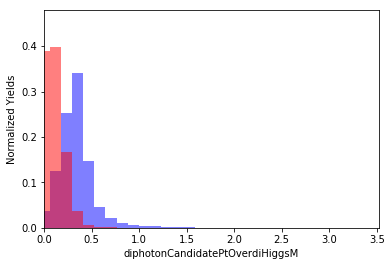

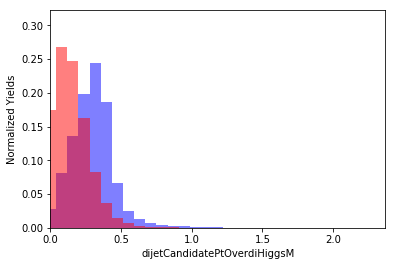

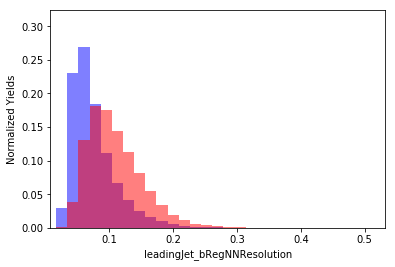

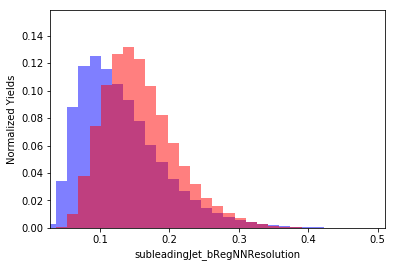

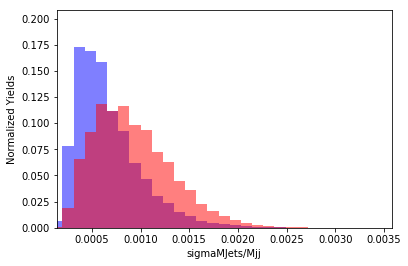

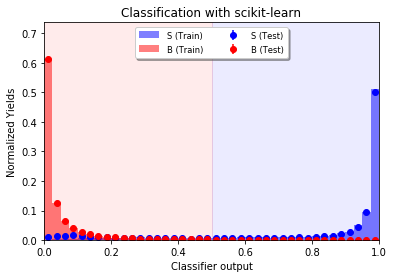

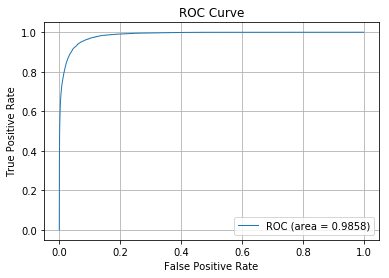

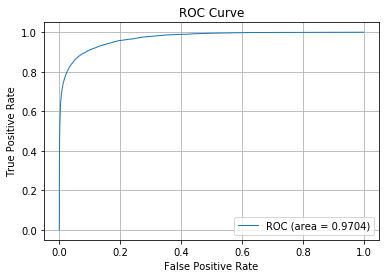

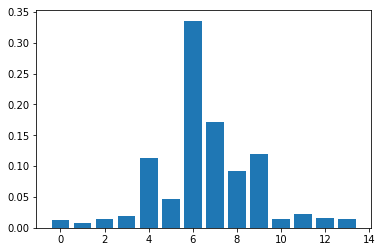

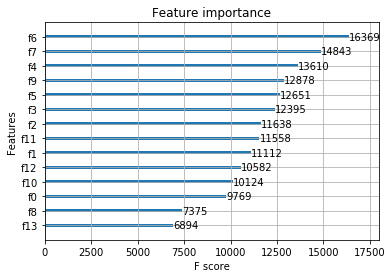

/home/ovtin/.local/lib/python2.7/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


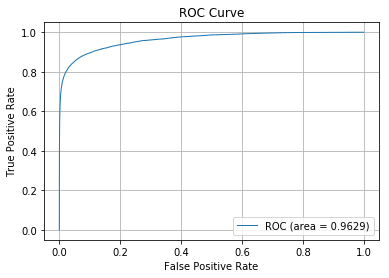

Accuracy: 96.55%


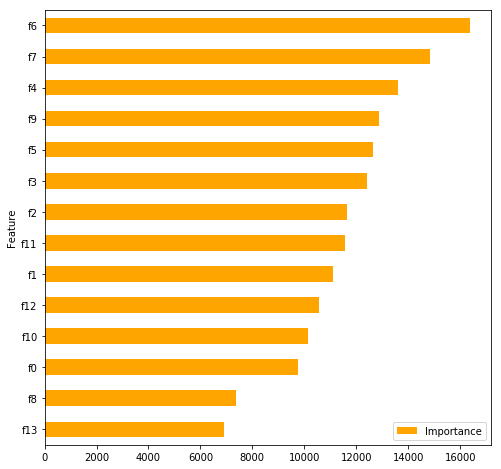

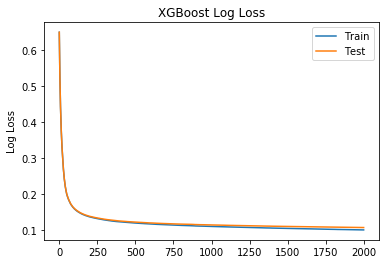

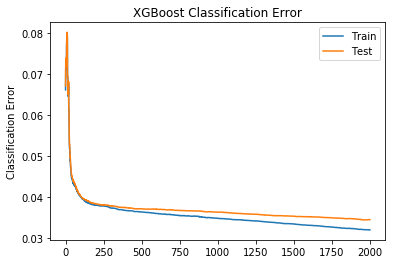

In [5]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from sklearn.metrics import accuracy_score

# converts the target tree to a graphviz instance
#xgb.to_graphviz(clf, num_trees=clf.best_iteration)
#xgb.to_graphviz(clf, num_trees=4)
#plt.show()

plotting.plot_input_variables(X_sig,X_bkg,branch_names)
plt.show()
plotting.plot_classifier_output(clf,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_test_st_values_notcut")
plt.show()
fpr,tpr = plotting.plot_roc_curve(X_total_train,y_total_train,clf)
plotting.print_roc_report(fpr,tpr)
plt.savefig(utils.IO.plotFolder+"ROC_train.eps")
plt.show()
fpr,tpr = plotting.plot_roc_curve(X_total_test,y_total_test,clf)
plotting.print_roc_report(fpr,tpr)
plt.show()

plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.savefig(utils.IO.plotFolder+"importance1.eps")
plt.show()
#
xgb.plot_importance(clf)
plt.savefig(utils.IO.plotFolder+"importance2.eps")
plt.show()
#
#fpr_gJets_2ndtest_2,tpr_gJets_2ndtest_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-2,outString="xgbr_gJets_resWeighting_optimized_noDR_minDRGJet_withDR_dijetMass",weights=w_total_test)
#plt.show()
fpr_dipho_2ndtest_2,tpr_dipho_2ndtest_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-1,outString="xgbr_diphotons_resWeighting_optimized_noDR_minDRGJet_withDR_dijetMass",weights=w_total_test)
plt.show()

# #############################################################################
# plot single tree
#xgb.to_graphviz(clf, num_trees=0)
#plot_tree(clf)
#plt.show()

#
# Plot feature importance
#importances = clf.get_fscore()
importances = clf.get_booster().get_score(importance_type='weight')
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')
#
# make predictions for test data
y_pred = clf.predict(X_total_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_total_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig(utils.IO.plotFolder+"XGBoostLogLoss.eps")
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.savefig(utils.IO.plotFolder+"XGBoostClassificationError.eps")
plt.show()

#feature_important = clf.get_booster().get_score(importance_type='weight')
#keys = list(feature_important.keys())
#values = list(feature_important.values())
#data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
#data.plot(kind='barh')


In [6]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.linear_model import LogisticRegression
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve
# Supervised transformation based on gradient boosted trees
#grd_enc = OneHotEncoder(categories='auto')
#grd_lm = LogisticRegression(solver='lbfgs', max_iter=20)
##grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
#grd_enc.fit(clf.apply(X_total_train)[:, :, 0])
##grd_enc.fit(clf.apply(X_total_train))
##grd_lm.fit(grd_enc.transform(clf.apply(X_total_test)[:, :, 0]), y_total_test)
##grd_lm.fit(grd_enc.transform(clf.apply(X_total_test).toarray()), y_total_test)

#y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(clf.apply(X_total_test)[:, :, 0]))[:, 1]
##y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(clf.apply(X_total_test)))
##fpr_grd_lm, tpr_grd_lm = roc_curve(y_total_test, y_pred_grd_lm)
#fpr_grd_lm, tpr_grd_lm = plotting.plot_roc_curve(X_total_test,y_pred_grd_lm,grd_lm)
#plt.show()

## The gradient boosted model by itself
#y_pred_grd = clf.predict_proba(X_total_test)[:, 1]
##fpr_grd, tpr_grd = roc_curve(y_total_test, y_pred_grd)
#fpr_grd, tpr_grd = plotting.plot_roc_curve(y_total_test, y_pred_grd, clf)
#plt.show()

#plotting.plot_classifier_output(grd_lm,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_test_st_values_notcut")
#plt.show()